In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

import fannypack
from lib import dpf, panda_models, panda_datasets, panda_training, omnipush_datasets


import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-poster')

print(torch.__version__, np.__version__)

1.4.0 1.18.1


In [3]:
def eval_experiment(experiment_name, true_initial=True):
    # Experiment configuration
    dynamics_model = panda_models.PandaDynamicsModel(units=32)
    measurement_model = panda_models.PandaMeasurementModel(units=64)

    pf_model = panda_models.PandaParticleFilterNetwork(
        dynamics_model,
        measurement_model
    )

    # Create buddy
    buddy = fannypack.utils.Buddy(
        experiment_name,
        pf_model,
        optimizer_names=["e2e", "dynamics", "dynamics_recurrent", "measurement"]
    )
    
    # Load eval data
    dataset_args = buddy.metadata
    eval_trajectories = panda_datasets.load_trajectories(
        ("data/gentle_push_100.hdf5", 100),
        **dataset_args
    )
    
    # Plotting, etc
    phases = [
#         'phase_0_dynamics_pretrain',
#         'phase_1_dynamics_pretrain_recurrent',
#         'phase_2_measurement_pretrain',
        'phase_3_end_to_end_trained'
    ]
    for phase in phases:
        try:
            buddy.load_checkpoint(label=phase)
        except FileNotFoundError:
            print(f"Skipping {phase}")
            continue

        print(f"Evaluating {phase}")
        pf_model.dynamics_model.state_noise_stddev = (0.02, 0.02)
        with torch.no_grad():
            panda_training.rollout_and_eval(
                pf_model,
                eval_trajectories,
                start_time=0,
                max_timesteps=1000,
                particle_count=200,
                noisy_dynamics=True,
                true_initial=true_initial)


[buddy-dpf_mujoco_blackout0_unfrozen] Using device: cuda
[buddy-dpf_mujoco_blackout0_unfrozen] Available checkpoint labels: ['0000000000195787', 'phase_3_end_to_end_trained']
[buddy-dpf_mujoco_blackout0_unfrozen] Read checkpoint from path: checkpoints/dpf_mujoco_blackout0_unfrozen-0000000000195787.ckpt
[buddy-dpf_mujoco_blackout0_unfrozen] Loaded checkpoint at step: 195787
[buddy-dpf_mujoco_blackout0_unfrozen] Read checkpoint from path: checkpoints/dpf_mujoco_blackout0_unfrozen-phase_3_end_to_end_trained.ckpt
[buddy-dpf_mujoco_blackout0_unfrozen] Loaded checkpoint at step: 195787
Evaluating phase_3_end_to_end_trained



0.028792681500057243


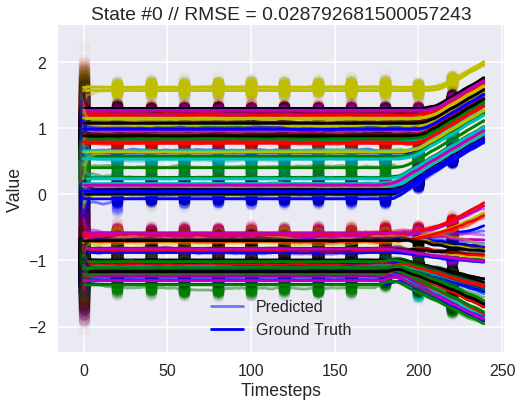

0.025675423533147154


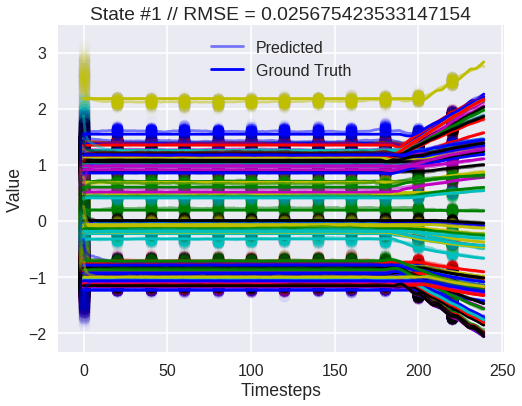

In [4]:
eval_experiment("dpf_mujoco_blackout0_unfrozen")

[buddy-dpf_mujoco_blackout0] Using device: cuda
[buddy-dpf_mujoco_blackout0] Loaded metadata: {'image_blackout_ratio': 0, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-dpf_mujoco_blackout0] Available checkpoint labels: ['0000000000170000', '0000000000180000', '0000000000190000', '0000000000191097', '0000000000195787', 'phase_0_dynamics_pretrain', 'phase_1_dynamics_pretrain_recurrent', 'phase_2_measurement_pretrain', 'phase_3_end_to_end_trained']
[buddy-dpf_mujoco_blackout0] Read checkpoint from path: checkpoints/dpf_mujoco_blackout0-0000000000195787.ckpt
[buddy-dpf_mujoco_blackout0] Loaded checkpoint at step: 195787
[buddy-dpf_mujoco_blackout0] Read checkpoint from path: checkpoints/dpf_mujoco_blackout0-phase_3_end_to_end_trained.ckpt
[buddy-dpf_mujoco_blackout0] Loaded checkpoint at step: 195787
Evaluating phase_3_end_to_end_trained



0.028054882765543656


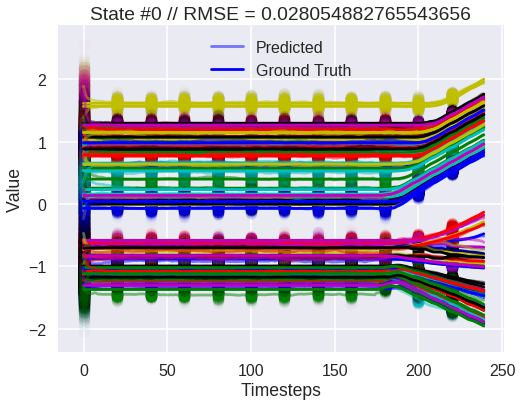

0.024808769989820505


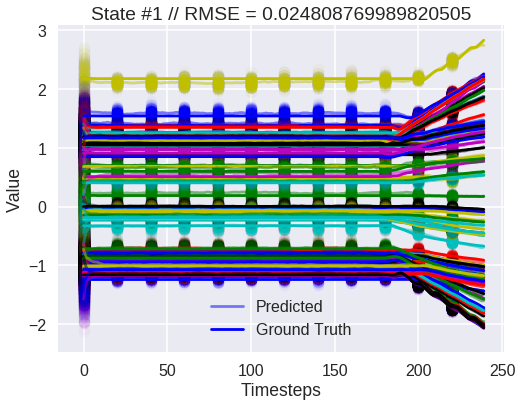

In [5]:
eval_experiment("dpf_mujoco_blackout0")

[buddy-dpf_mujoco_blackout4] Using device: cuda
[buddy-dpf_mujoco_blackout4] Loaded metadata: {'image_blackout_ratio': 0.4, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-dpf_mujoco_blackout4] Available checkpoint labels: ['0000000000170000', '0000000000180000', '0000000000190000', '0000000000191097', '0000000000195787', 'phase_0_dynamics_pretrain', 'phase_1_dynamics_pretrain_recurrent', 'phase_2_measurement_pretrain', 'phase_3_end_to_end_trained']
[buddy-dpf_mujoco_blackout4] Read checkpoint from path: checkpoints/dpf_mujoco_blackout4-0000000000195787.ckpt
[buddy-dpf_mujoco_blackout4] Loaded checkpoint at step: 195787
[buddy-dpf_mujoco_blackout4] Read checkpoint from path: checkpoints/dpf_mujoco_blackout4-phase_3_end_to_end_trained.ckpt
[buddy-dpf_mujoco_blackout4] Loaded checkpoint at step: 195787
Evaluating phase_3_end_to_end_trained



0.0425930247664072


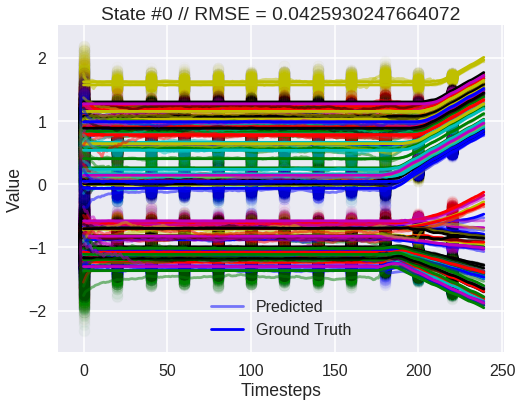

0.04063518541361902


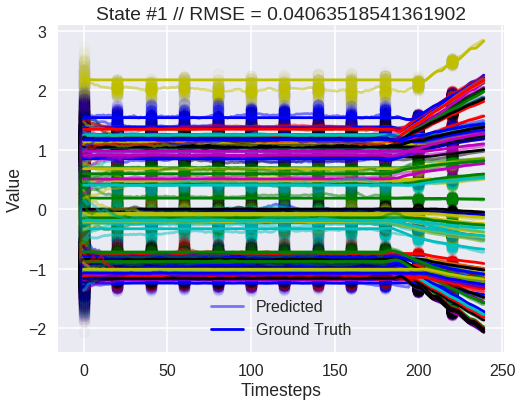

In [6]:
eval_experiment("dpf_mujoco_blackout4")

[buddy-dpf_mujoco_blackout8] Using device: cuda
[buddy-dpf_mujoco_blackout8] Loaded metadata: {'image_blackout_ratio': 0.8, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-dpf_mujoco_blackout8] Available checkpoint labels: ['0000000000170000', '0000000000180000', '0000000000190000', '0000000000191097', '0000000000195787', 'phase_0_dynamics_pretrain', 'phase_1_dynamics_pretrain_recurrent', 'phase_2_measurement_pretrain', 'phase_3_end_to_end_trained']
[buddy-dpf_mujoco_blackout8] Read checkpoint from path: checkpoints/dpf_mujoco_blackout8-0000000000195787.ckpt
[buddy-dpf_mujoco_blackout8] Loaded checkpoint at step: 195787
[buddy-dpf_mujoco_blackout8] Read checkpoint from path: checkpoints/dpf_mujoco_blackout8-phase_3_end_to_end_trained.ckpt
[buddy-dpf_mujoco_blackout8] Loaded checkpoint at step: 195787
Evaluating phase_3_end_to_end_trained



0.20095822698586396


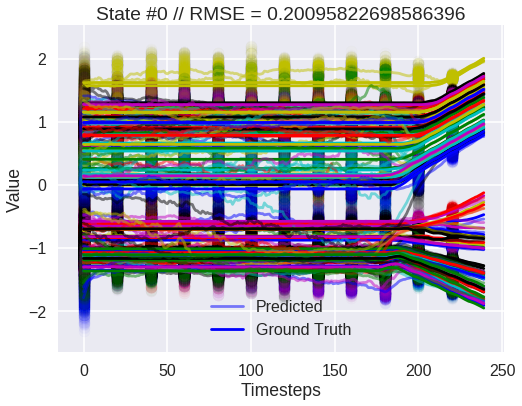

0.22722910308993505


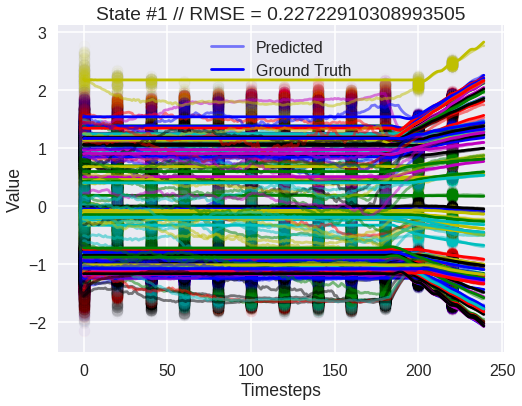

In [7]:
eval_experiment("dpf_mujoco_blackout8")

[buddy-dpf_mujoco_seq5] Using device: cuda
[buddy-dpf_mujoco_seq5] Loaded metadata: {'image_blackout_ratio': 0.0, 'sequential_image_rate': 5, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-dpf_mujoco_seq5] Available checkpoint labels: ['0000000000170000', '0000000000180000', '0000000000190000', '0000000000191097', '0000000000195787', 'phase_0_dynamics_pretrain', 'phase_1_dynamics_pretrain_recurrent', 'phase_2_measurement_pretrain', 'phase_3_end_to_end_trained']
[buddy-dpf_mujoco_seq5] Read checkpoint from path: checkpoints/dpf_mujoco_seq5-0000000000195787.ckpt
[buddy-dpf_mujoco_seq5] Loaded checkpoint at step: 195787
[buddy-dpf_mujoco_seq5] Read checkpoint from path: checkpoints/dpf_mujoco_seq5-phase_3_end_to_end_trained.ckpt
[buddy-dpf_mujoco_seq5] Loaded checkpoint at step: 195787
Evaluating phase_3_end_to_end_trained



0.0270994101804515


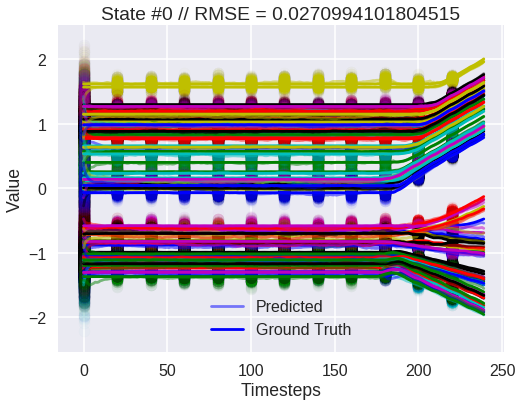

0.024267865050171335


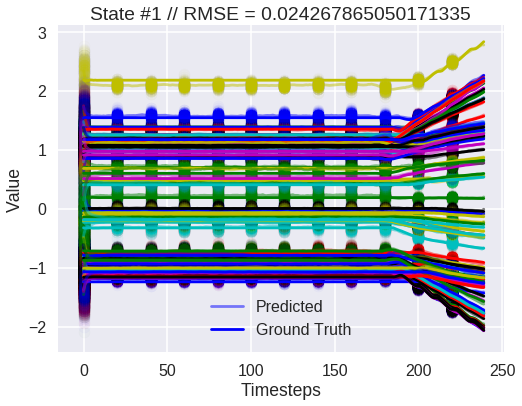

In [8]:
eval_experiment("dpf_mujoco_seq5")